<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Linear-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
import sklearn
import numpy as np
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0-rc1


In [0]:
from sklearn.datasets import load_breast_cancer 
D = load_breast_cancer()

In [92]:
D.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [93]:
X = D['data']
# X.shape # --> (569, 30)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [94]:
Y = D['target']
# Y.shape # --> (569,)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [95]:
# from sklearn.utils import shuffle
X, Y = sklearn.utils.shuffle(X, Y)
Y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [0]:
def Label(Y):
    v = np.zeros(shape=(len(Y), len(set(Y))))
    for i in range(len(Y)):
        v[i, Y[i]] = 1
    
    return v


In [97]:
Y = Label(Y)
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [98]:
D['target_names'] # malignant --> 0 and benign --> 1

array(['malignant', 'benign'], dtype='<U9')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()

X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

In [101]:
N, D = X_train.shape
print(N, D)

381 30


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D)),
    tf.keras.layers.Dense(units=2, activation='softmax')                             
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)

In [104]:
result = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500)

Train on 381 samples, validate on 188 samples
Epoch 1/500
381/381 [==============================] - 0s 1ms/sample - loss: 0.5065 - accuracy: 0.7507 - val_loss: 0.5002 - val_accuracy: 0.7713
Epoch 2/500
381/381 [==============================] - 0s 129us/sample - loss: 0.4370 - accuracy: 0.8110 - val_loss: 0.4336 - val_accuracy: 0.8404
Epoch 3/500
381/381 [==============================] - 0s 120us/sample - loss: 0.3863 - accuracy: 0.8451 - val_loss: 0.3811 - val_accuracy: 0.8511
Epoch 4/500
381/381 [==============================] - 0s 116us/sample - loss: 0.3436 - accuracy: 0.8635 - val_loss: 0.3423 - val_accuracy: 0.8670
Epoch 5/500
381/381 [==============================] - 0s 125us/sample - loss: 0.3100 - accuracy: 0.8845 - val_loss: 0.3123 - val_accuracy: 0.8723
Epoch 6/500
381/381 [==============================] - 0s 118us/sample - loss: 0.2846 - accuracy: 0.8924 - val_loss: 0.2866 - val_accuracy: 0.8830
Epoch 7/500
381/381 [==============================] - 0s 141us/sample - l

In [105]:
print('Training Accuracy: {}'.format(model.evaluate(X_train, Y_train)))
print('Testing Accuracy: {}'.format(model.evaluate(X_test, Y_test)))

# # Evaluate the model - evaluate() returns loss and accuracy
# print("Train score:", model.evaluate(X_train, Y_train))
# print("Test score:", model.evaluate(X_test, Y_test))

381/381 [==============================] - 0s 71us/sample - loss: 0.0460 - accuracy: 0.9869
Training Accuracy: [0.04604372030168068, 0.98687667]
188/188 [==============================] - 0s 74us/sample - loss: 0.1014 - accuracy: 0.9681
Testing Accuracy: [0.1014460341093388, 0.9680851]


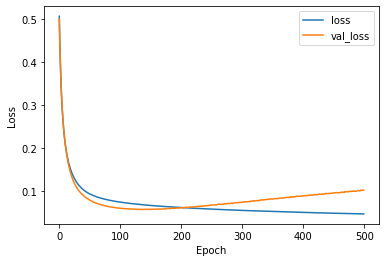

In [106]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

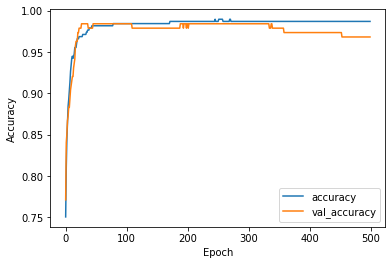

In [107]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()